## Regression

### Generating Examples

In [62]:
import numpy as np

def true_fun(X):
  return np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 40
X = np.random.rand(n_samples)

X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1

X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

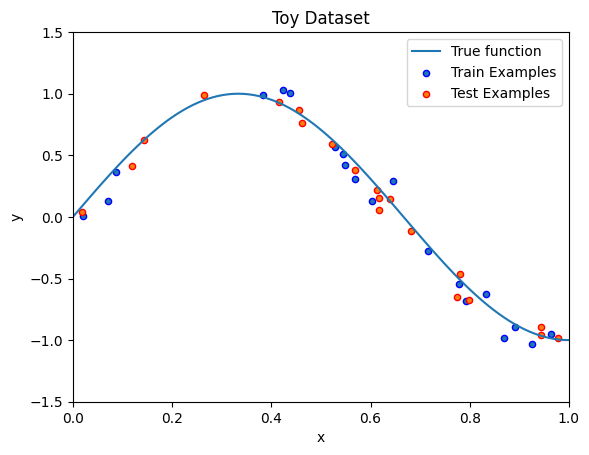

In [63]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

### Linear Regression

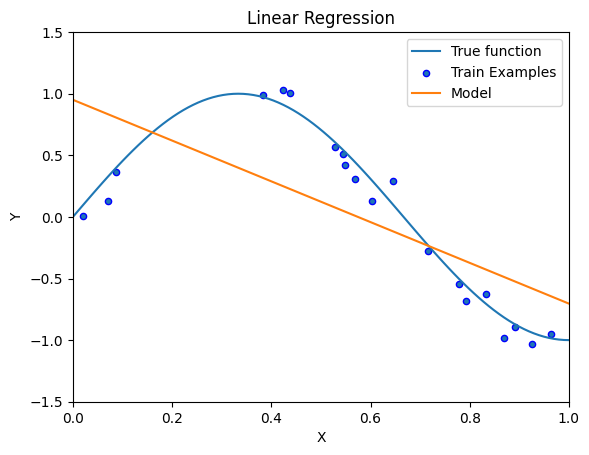

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)

plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 1)
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Linear Regression")
plt.show()


### Task 1

In [6]:
y_pred = linear_regression.predict(X_test[:, np.newaxis])
mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is {mse}")

The mean squared error is 0.1736489094130998


### Polynomial Regression

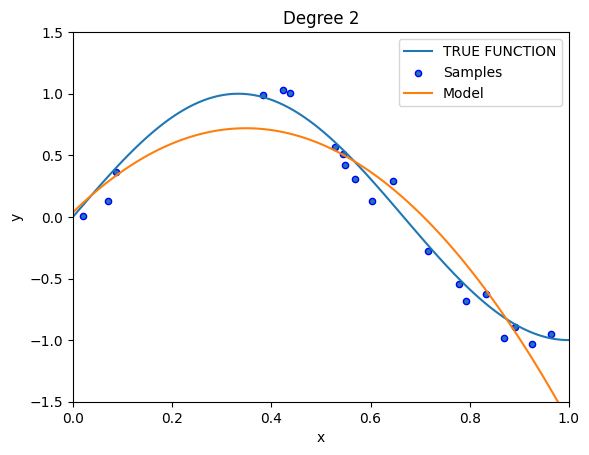

In [65]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

x = np.linspace(0, 1, 100)

plt.plot(x, true_fun(x), label="TRUE FUNCTION")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

y_poly2_pred = q_model.predict(polynomial_features.fit_transform(X_test[:, np.newaxis]))
mse2 = mean_squared_error(y_test, y_poly2_pred)

### Task 2

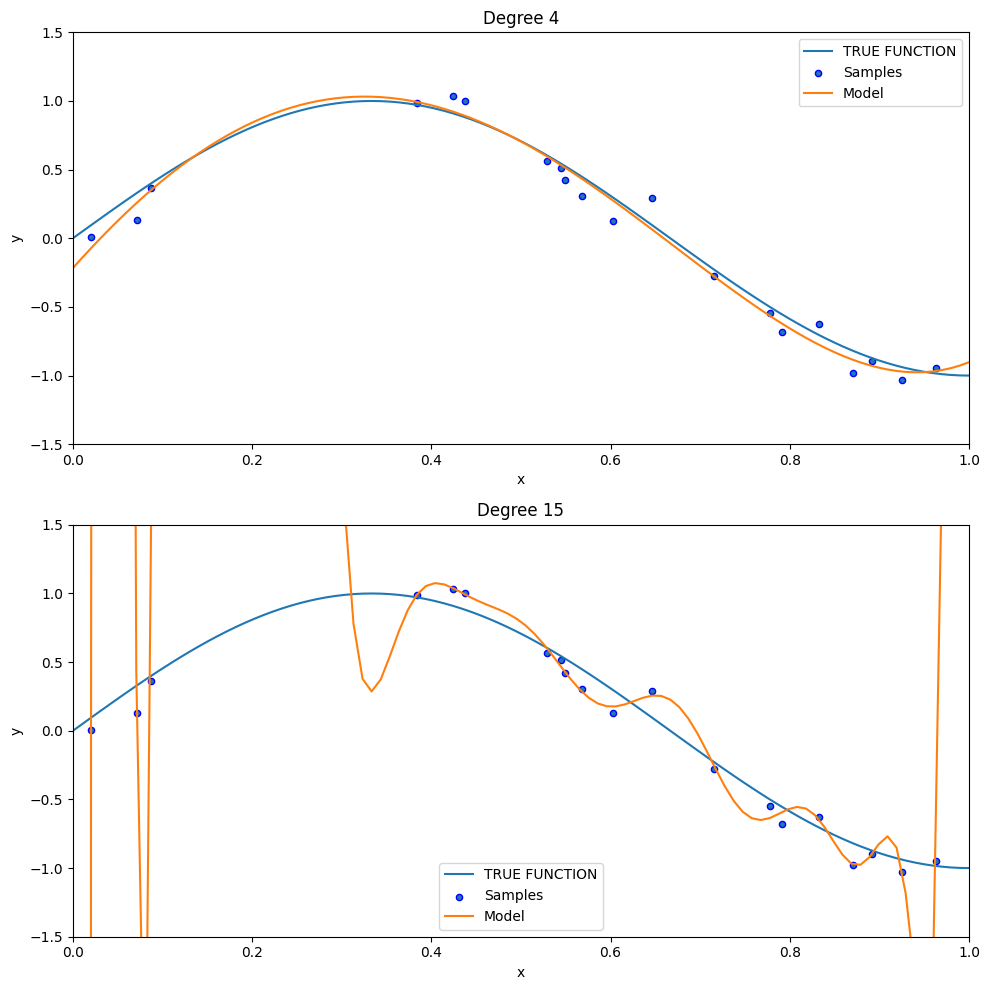

In [66]:
degrees = [4, 15]
y_poly_pred4_and15 = []
mse = []

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
x = np.linspace(0, 1, 100)

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree, include_bias=True)
    q_model = LinearRegression()
    q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

    axes[i].plot(x, true_fun(x), label="TRUE FUNCTION")
    axes[i].scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    axes[i].plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")

    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_xlim((0, 1))
    axes[i].set_ylim((-1.5, 1.5))

    axes[i].legend(loc="best")
    axes[i].set_title(f"Degree {degree}")

    y_pred = q_model.predict(polynomial_features.fit_transform(X_test[:, np.newaxis]))
    y_poly_pred4_and15.append(y_pred)
    mse.append(mean_squared_error(y_test, y_pred))

plt.tight_layout()
plt.show()

### Task 3

In [67]:
print(f"The mean sqaured error for polynomial of degree 2 is {mse2}")
print(f"The mean sqaured error for polynomial of degree 4 is {mse[0]}")
print(f"The mean sqaured error for polynomial of degree 15 is {mse[1]}")

The mean sqaured error for polynomial of degree 2 is 0.05626601819711916
The mean sqaured error for polynomial of degree 4 is 0.004641799299812718
The mean sqaured error for polynomial of degree 15 is 503.6525031549251


The model with polynomial of degree 4 has the lowest MSE, indiciating that it's the best one out of the three.

## Classification

### Generating Examples

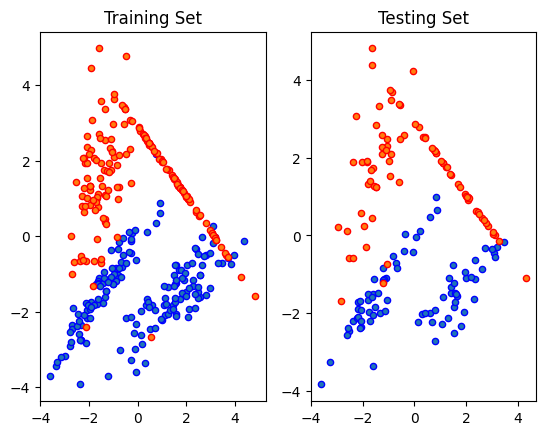

In [70]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_clusters_per_class=2,
                           random_state=0, shuffle=True, class_sep=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in np.unique(y_train):
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)],
              [X_train[i, 1] for i in np.where(y_train==c)],
              edgecolor=colors[c], s=20, label="Samples")
  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)],
              [X_test[i, 1] for i in np.where(y_test==c)],
              edgecolor=colors[c], s=20, label="Samples")

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


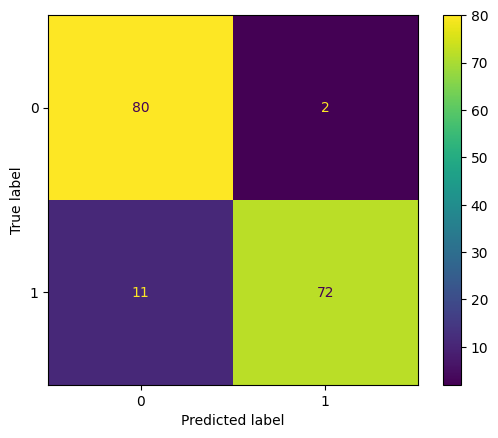

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

clf = RandomForestClassifier(n_estimators=2,
                             criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)

clf.fit(X_train, y_train)
print("Training Accuracy: ", clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Task 4

In [72]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.9260469260469261
Recall: 0.9215398178078167
F1-score: 0.9210264717793897


Accuracy may not always be the most suitable metric for dealing with imbalanced classes (where one class heavily outweighs other classes), as a model may achieve high accuracy by predicting only the majority class, despite poor performance on the minority class. This is where other metrics like precision, recall, and f1-score come into play, as they provide more accurate metrics on the model.

### Task 5

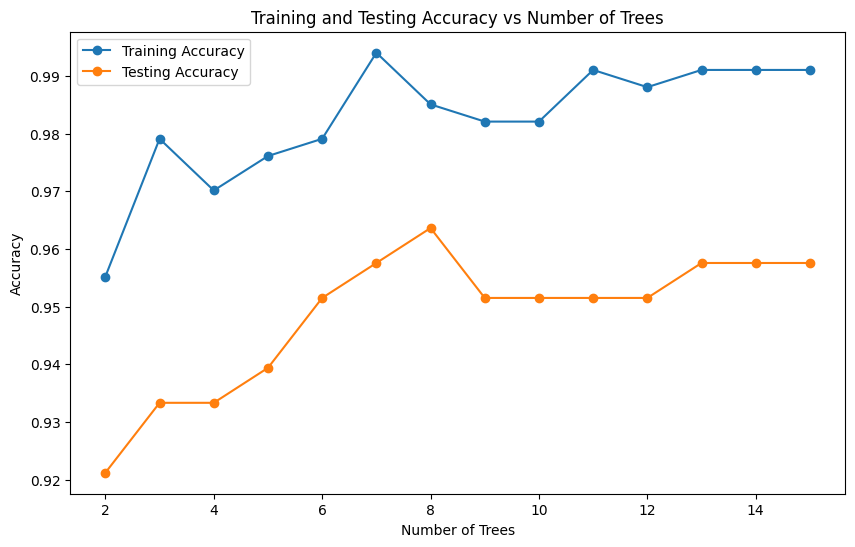

In [76]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

for num_trees in range(2, 16):
    clf = RandomForestClassifier(n_estimators=num_trees,
                                 criterion="entropy",
                                 max_features="sqrt", max_samples=.8,
                                 random_state=0)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(2, 16), test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Number of Trees')
plt.legend()
plt.show()


The training accuracy is overall higher than the testing accuracy, and it peaks at around 7 trees then it decreases a bit and stabilizes as trees increase. The testing accuracy peaks at around 8 trees, but stays lower than the training accuracy.

### Decision Surface

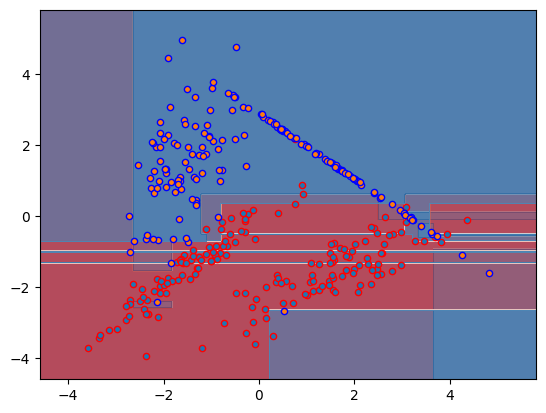

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02

clf = RandomForestClassifier(n_estimators=2,
                             criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)
clf.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

colors = ["r", "b"]
for c in np.unique(y_train):
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)],
              [X_train[i, 1] for i in np.where(y_train==c)],
              edgecolor=colors[c], s=20, label="Samples")

### Task 6

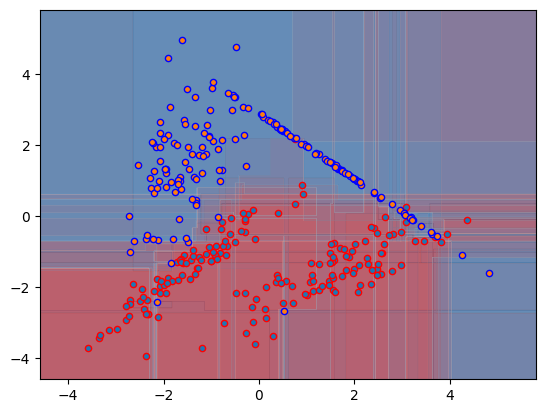

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02

clf = RandomForestClassifier(n_estimators=10,
                             criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)
clf.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

colors = ["r", "b"]
for c in np.unique(y_train):
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)],
              [X_train[i, 1] for i in np.where(y_train==c)],
              edgecolor=colors[c], s=20, label="Samples")

The second image has more complex boundaries than the first one, which might indicate overfitting of the data sometimes, as the complexity could be due to noise data.

### Classification with SVM

In [17]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ", clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


### Task 7

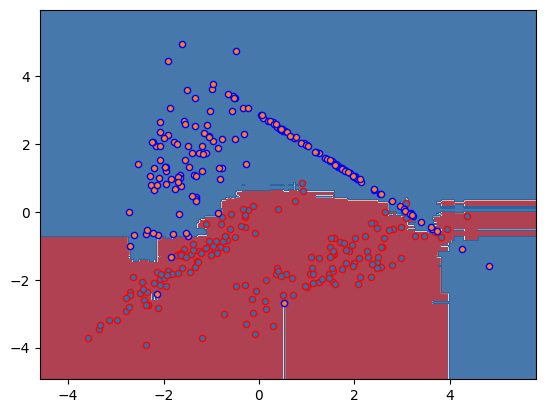

In [78]:
cmap = plt.cm.RdBu
plot_step = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1],
                edgecolor=colors[c], s=20, label=f"Class {c}")

plt.show()

### Task 8

Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636


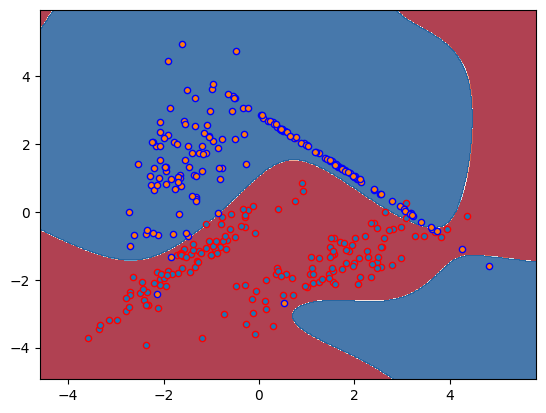

In [19]:
clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ", clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

cmap = plt.cm.RdBu
plot_step = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1],
                edgecolor=colors[c], s=20, label=f"Class {c}")

plt.show()

Using rbf kernel fits the data non-linearly and more flexibly, unlike the linear kernel which fits the data and separates it almost in a straight line.

### Task 9

Training Accuracy with C=0.5:  0.9522
Testing  Accuracy with C=0.5:  0.9576

Training Accuracy with C=1:  0.9522
Testing  Accuracy with C=1:  0.9576

Training Accuracy with C=100:  0.9701
Testing  Accuracy with C=100:  0.9636

Training Accuracy with C=1000:  0.9701
Testing  Accuracy with C=1000:  0.9636



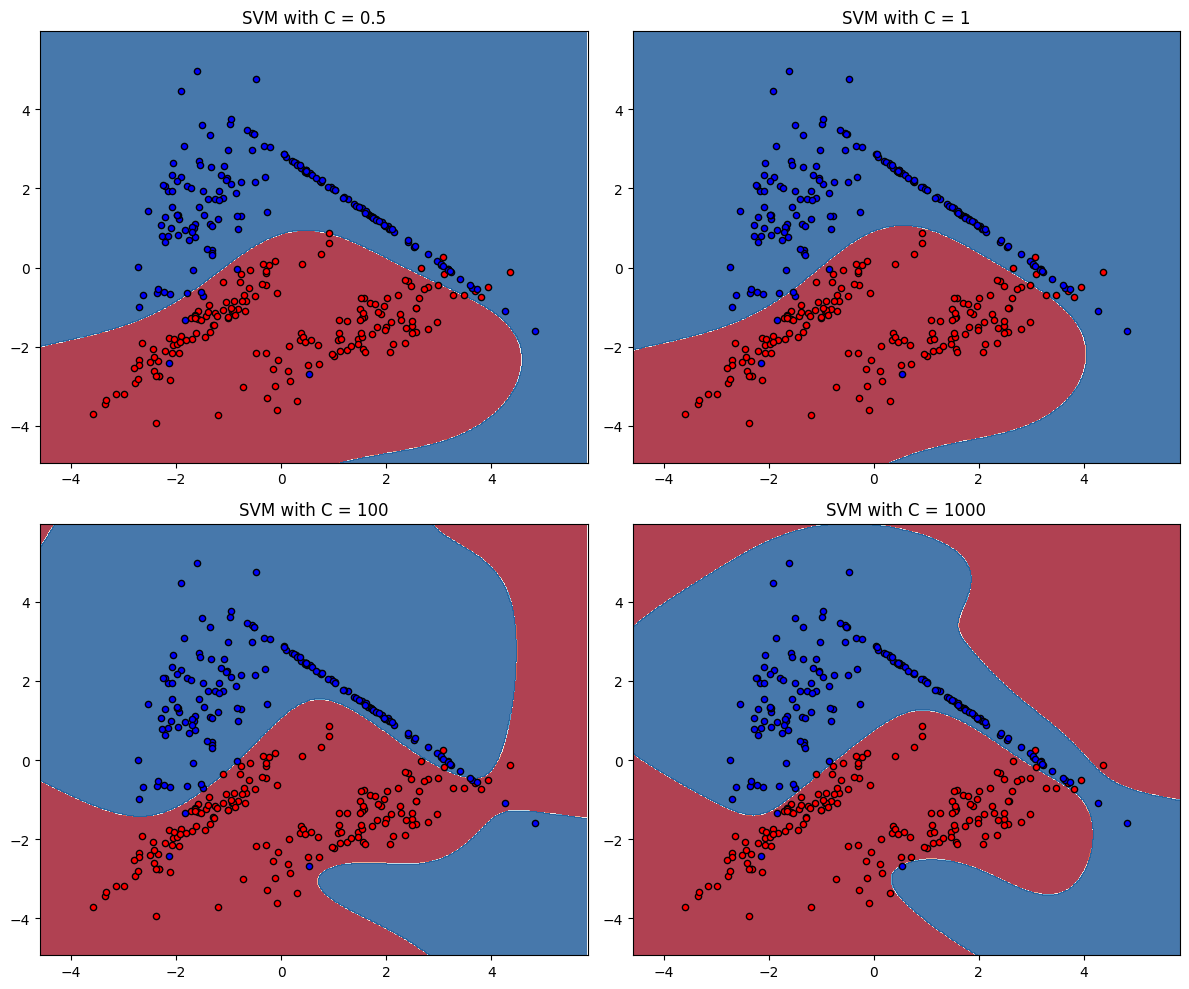

In [79]:
C_values = [0.5, 1, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, c_value in enumerate(C_values):
    clf = svm.SVC(kernel="rbf", C=c_value)
    clf.fit(X_train, y_train)
    print(f"Training Accuracy with C={c_value}:  {clf.score(X_train, y_train):.4f}")
    print(f"Testing  Accuracy with C={c_value}:  {clf.score(X_test, y_test):.4f}\n")

    cmap = plt.cm.RdBu
    plot_step = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[idx]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    colors = ["r", "b"]
    for c in np.unique(y_train):
        ax.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1],
                   edgecolor='k', facecolor=colors[c], s=20, label=f"Class {c}")

    ax.set_title(f"SVM with C = {c_value}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

The accuracies for C values 0.5 and 1 are identical. The same goes for C values 100 and 1000. the first pair indicate a more smooth fitting, unlike the second pair which indicate a more complex fitting, which might suggest overfitting.

## Hyper-Parameters Selection

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


###Task 10

In [55]:
import pandas as pd
cv_results = pd.DataFrame(clf.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.007952      0.002340         0.002403        0.002012       1   
1       0.006240      0.003412         0.004327        0.003219       1   
2       0.014910      0.004969         0.001539        0.000095      10   
3       0.004066      0.002777         0.004419        0.003796      10   
4       0.035068      0.011808         0.001733        0.000396     100   
5       0.005160      0.001120         0.002871        0.001368     100   

  param_kernel                          params  split0_test_score  \
0       linear    {'C': 1, 'kernel': 'linear'}           0.850746   
1          rbf       {'C': 1, 'kernel': 'rbf'}           0.925373   
2       linear   {'C': 10, 'kernel': 'linear'}           0.850746   
3          rbf      {'C': 10, 'kernel': 'rbf'}           0.925373   
4       linear  {'C': 100, 'kernel': 'linear'}           0.850746   
5          rbf     {'C': 100, 'kernel': 'rbf'}           0.9

The values include different metrics for the time each fold took during cross validation. It also shows the scores for each split for the folds and specifies which one is linear and which is rbf, along with the metrics for each one.